# 乳がん分類データセットの主成分分析(Principal Component Analysis)

### ライブラリの読み込み

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### データセットのインスタンス(dataset)を作成
- dataset.target_names: 予測変数のラベル名(malignant(悪性) / benign(良性))
- dataset.target: 悪性(0) or 良性(1)
- dataset.feature_names: 各変数名のリスト
- dataset.data: 各変数の値(array)

In [20]:
# データセットの読み込み
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

説明変数の取り出し

In [21]:
# 説明変数の取得
X = dataset.data
# print(X)

分類変数の取り出し

In [22]:
# 目的変数(分類変数)の取得
y = dataset.target
# print(y)

### Pandas DataFrame型へ変換

説明変数名のリスト

In [23]:
# 説明変数(列名)のリスト
cols = dataset.feature_names

In [24]:
# DataFrameへ変換
X = pd.DataFrame(X, columns=cols)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
"""
malignant: 悪性
benign: 良性
"""
# 悪性と良性でデータを分けて取り出す
X_malignant = X[y == 0]  # 悪性
X_benign = X[y == 1]  # 良性

### ヒストグラム
#### 変数１つで確認

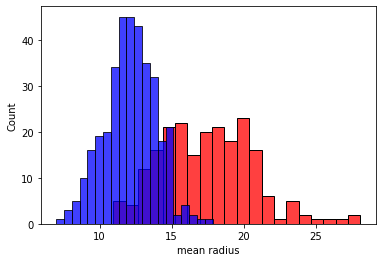

In [27]:
""" 変数１つでヒストグラム描画 """
# 確認する列名
col = 'mean radius'
# ヒストグラムをプロット
sns.histplot(X_malignant[col], bins=20, kde=False, color='red')  # 悪性
sns.histplot(X_benign[col], bins=20, kde=False, color='blue')  # 良性
# グラフを表示
plt.show()

すべての変数のヒストグラム

In [28]:
# 列(変数)の数 --> 30個
print(f"列数: {X.shape[1]}")

列数: 30


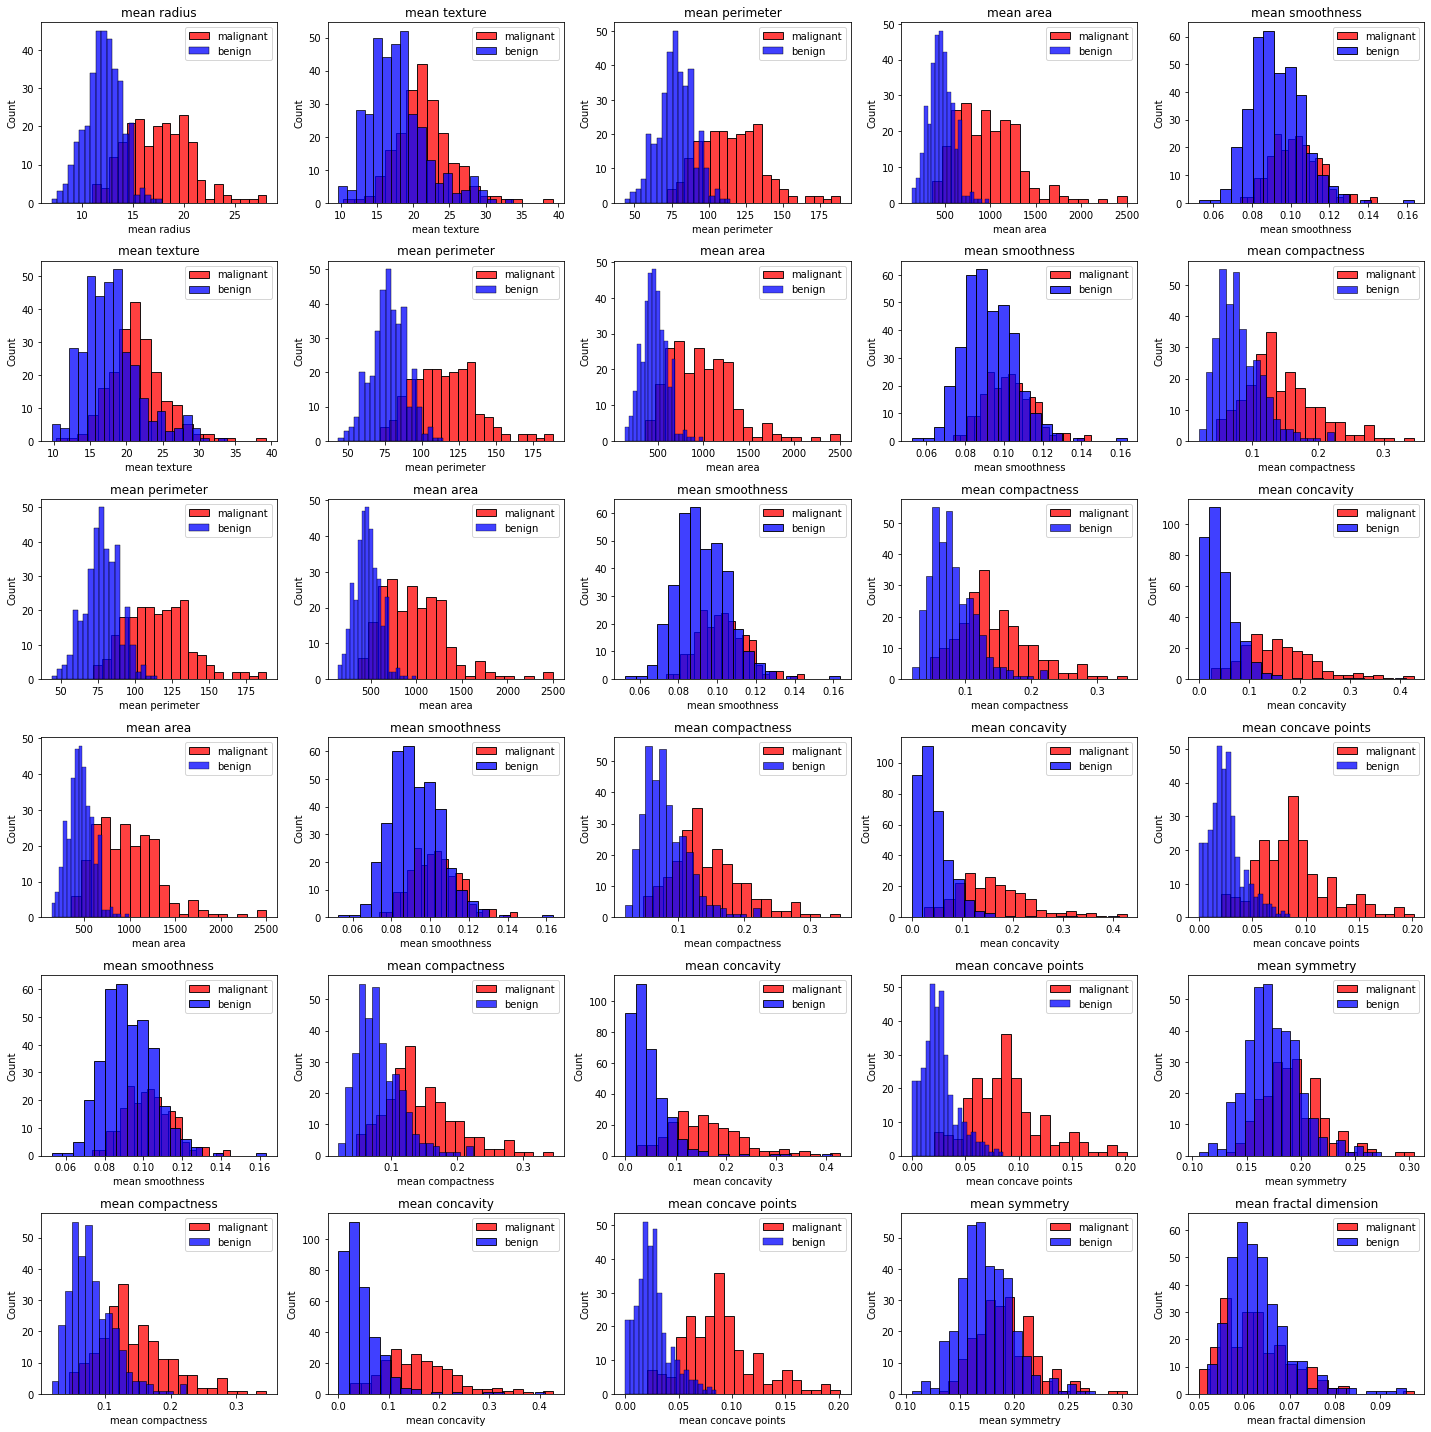

In [29]:
""" 全ての変数をヒストグラム描画 """
# 6行5列の配置でfigureオブジェクトとaxesオブジェクトの作成
fig, ax = plt.subplots(6,5, figsize=(20, 20)) # figsize(wide, vert)

"""
ax=ax[i]: i番目のグラフに描画
"""
for i in range(6):
    for j in range(5):
        sns.histplot(X_malignant[cols[i+j]], ax=ax[i][j], 
                     bins=20, kde=False, color='red')  # 悪性
        sns.histplot(X_benign[cols[i+j]], ax=ax[i][j], 
                     bins=20, kde=False, color='blue')  # 良性
        # 判例の表示
        ax[i][j].legend(["malignant", "benign"], loc="best")
        # タイトル
        ax[i][j].set_title(cols[i+j])

# グラフ同士の重なりを防ぐ
fig.tight_layout()

# plt.savefig('hist.png')
plt.show()

### 標準化

In [30]:
""" Standardization(標準化) """
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(X)

### 主成分分析(PCA)

In [31]:
""" PCA """
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_std)

print("X_pca shape:{}".format(X_pca.shape))
print("Explained variance ratio:{}".format(pca.explained_variance_ratio_))

X_pca shape:(569, 3)
Explained variance ratio:[0.44272026 0.18971182 0.09393163]


In [32]:
# DataFrameへ変換
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
X_pca = pd.concat([X_pca, pd.DataFrame(y, columns=["target"])], axis=1)

X_pca_malignant = X_pca[X_pca["target"]==0]
X_pca_benign = X_pca[X_pca["target"]==1]

### 結果の描画
#### ２次元グラフ

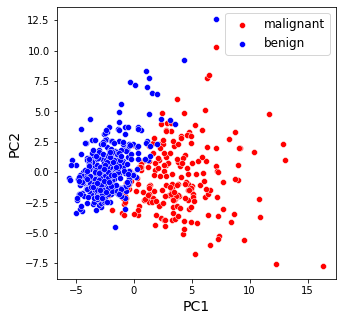

In [33]:
""" ２次元散布図 """
# figureオブジェクトとaxesオブジェクトの作成
# １つの場合は明示的に配置数の指定が不要
fig, ax = plt.subplots(figsize=(5, 5))  # figsize(wide, vert)

sns.scatterplot(x='PC1', y='PC2', data=X_pca_malignant, color='red')
sns.scatterplot(x='PC1', y='PC2', data=X_pca_benign, color='blue')
# 判例の表示
plt.legend(["malignant", "benign"], loc="best", fontsize=12)
# 軸ラベル
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.show()

#### ３次元グラフ

In [35]:
""" ３次元散布図 """
import plotly.graph_objects as go


# グラフのインスタンス作成
fig = go.Figure()

# ３次元散布図をグラフインタンスに追加
# 悪性 malignant
x = X_pca_malignant['PC1']
y = X_pca_malignant['PC2']
z = X_pca_malignant['PC3']
fig.add_traces(go.Scatter3d(
    x=x, y=y, z=z,
    # プロットスタイルの指定
    mode='markers',
    # マーカーサイズと色の指定
    marker=dict(color='red', size=3),
    # データ名
    name='malignant',
))
# 良性 benign
x = X_pca_benign['PC1']
y = X_pca_benign['PC2']
z = X_pca_benign['PC3']
fig.add_traces(go.Scatter3d(
    x=x, y=y, z=z,
    # プロットスタイルの指定
    mode='markers',
    # マーカーサイズと色の指定
    marker=dict(color='blue', size=3),
    # データ名
    name='benign',
))

# 軸ラベル
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3',
        )
    )
# グラフサイズ
fig.update_layout(height=800, width=800)
# グラフの保存(HTML形式)
fig.write_html('3d_scatter.html')

fig.show()